In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

from pathlib import Path

from biopsykit.classification.model_selection import SklearnPipelinePermuter

from pepbench.io import compute_abs_error

from pepbench.plotting.results import boxplot_algorithm_performance, _plot_helper_algorithm_performance

from fau_colors import cmaps, register_fausans_font

In [3]:
#register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties_light)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.sans-serif"] = "FAUSans Office"

palette

[(0.3803921568627451, 0.49019607843137253, 0.6313725490196078),
 (0.7137254901960784, 0.7607843137254902, 0.807843137254902),
 (0.996078431372549, 0.807843137254902, 0.4627450980392157),
 (0.42745098039215684, 0.8156862745098039, 0.9647058823529412),
 (0.6745098039215687, 0.8235294117647058, 0.4588235294117647),
 (0.8666666666666667, 0.45098039215686275, 0.48627450980392156)]

In [4]:
data_path = Path("../../../results/data/b-point")
model_path = Path("../../../results/models/b-point")
output_image_path = Path("Images/Paper")

In [5]:
merged_ml_results_b_point_metrics = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics_rr_only.csv"), index_col=[0,1,2,3])
merged_ml_results_b_point_metrics

arbol2017-isoelectric-crossings_error  \
participant condition phase         heartbeat_id_reference                                          
GDN0005     Dummy     HoldingBreath 0                                                       -50.0   
                                    1                                                        64.0   
                                    3                                                        -6.0   
                                    4                                                        -4.0   
                                    5                                                       -12.0   
...                                                                                           ...   
VP_032      tsst      Talk          39                                                      -25.0   
                                    40                                                       -9.0   
                                    41                                                       23.0   
                                    42                                                      -54.0   
                                    43                                                      -35.0   

                                                            arbol2017-isoelectric-crossings_rel_error  \
participant condition phase         heartbeat_id_reference                                              
GDN0005     Dummy     HoldingBreath 0                                                       -0.128866   
                                    1                                                        0.158416   
                                    3                                                       -0.015957   
                                    4                                                       -0.010256   
                                    5                                                       -0.031088   
...                                                                                               ...   
VP_032      tsst      Talk          39                                                      -0.080645   
                                    40                                                      -0.027950   
                                    41                                                       0.067647   
                                    42                                                      -0.173633   
                                    43                                                      -0.114007   

                                                            arbol2017-isoelectric-crossings_abs_error  \
participant condition phase         heartbeat_id_reference                                              
GDN0005     Dummy     HoldingBreath 0                                                            50.0   
                                    1                                                            64.0   
                                    3                                                             6.0   
                                    4                                                             4.0   
                                    5                                                            12.0   
...                                                                                               ...   
VP_032      tsst      Talk          39                                                           25.0   
                                    40                                                            9.0   
                                    41                                                           23.0   
                                    42                                                           54.0   
                                    43                                                           35.0   

              

In [6]:
merged_ml_results_b_point = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_paper_rr_only.csv"), index_col=[0,1,2,3])
merged_ml_results_b_point

b_point_sample_reference  \
participant condition phase         heartbeat_id_reference                             
GDN0005     Dummy     HoldingBreath 0                                          388.0   
                                    1                                          404.0   
                                    3                                          376.0   
                                    4                                          390.0   
                                    5                                          386.0   
...                                                                              ...   
VP_032      tsst      Talk          39                                         310.0   
                                    40                                         322.0   
                                    41                                         340.0   
                                    42                                         311.0   
                                    43                                         307.0   

                                                            arbol2017-isoelectric-crossings  \
participant condition phase         heartbeat_id_reference                                    
GDN0005     Dummy     HoldingBreath 0                                                 438.0   
                                    1                                                 340.0   
                                    3                                                 382.0   
                                    4                                                 394.0   
                                    5                                                 398.0   
...                                                                                     ...   
VP_032      tsst      Talk          39                                                335.0   
                                    40                                                331.0   
                                    41                                                317.0   
                                    42                                                365.0   
                                    43                                                342.0   

                                                            arbol2017-second-derivative  \
participant condition phase         heartbeat_id_reference                                
GDN0005     Dummy     HoldingBreath 0                                             398.0   
                                    1                                             350.0   
                                    3                                             296.0   
                                    4                                             344.0   
                                    5                                             312.0   
...                                                                                 ...   
VP_032      tsst      Talk          39                                            276.0   
                                    40                                            298.0   
                                    41                                            300.0   
                                    42                                            324.0   
                                    43                                            313.0   

                                                            arbol2017-third-derivative  \
participant condition phase         heartbeat_id_reference                               
GDN0005     Dummy     HoldingBreath 0                                            394.0   
                                    1                                            244.0   
                                    3                                            386.0   
                                    4        

In [7]:
algo_dict = {
    "drost2022_abs_error": "Dro22",
    "MinMax_None_RFR_RR-Interval-Include-Nan_abs_error": "MinMax RFR Include NaN",
    #"SS_None_RFR_RR-Interval-Include-Nan_abs_error": "SS RFR Include NaN",
    #"SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error": "SS RFR Impute NaN",
    #"MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error": "MinMax RFR Impute NaN"
}

In [8]:
plot_data = merged_ml_results_b_point_metrics[algo_dict.keys()]
plot_data = plot_data.rename(columns=algo_dict)
plot_data

Dro22  \
participant condition phase         heartbeat_id_reference          
GDN0005     Dummy     HoldingBreath 0                        12.0   
                                    1                        16.0   
                                    3                        10.0   
                                    4                         6.0   
                                    5                         6.0   
...                                                           ...   
VP_032      tsst      Talk          39                        8.0   
                                    40                        0.0   
                                    41                        3.0   
                                    42                       43.0   
                                    43                       25.0   

                                                            MinMax RFR Include NaN  
participant condition phase         heartbeat_id_reference                          
GDN0005     Dummy     HoldingBreath 0                                    31.768000  
                                    1                                     0.648000  
                                    3                                     0.256000  
                                    4                                     1.293600  
                                    5                                     0.088444  
...                                                                            ...  
VP_032      tsst      Talk          39                                    0.040000  
                                    40                                    5.660000  
                                    41                                   15.168000  
                                    42                                   26.744000  
                                    43                                    0.900000  

[11239 rows x 2 columns]

Residualplot of best ml pipeline (MinMaxScaler - RandomForestRegressor - Include NaN) against reference 

In [9]:
merged_ml_results_b_point.columns

Index(['b_point_sample_reference', 'arbol2017-isoelectric-crossings',
       'arbol2017-second-derivative', 'arbol2017-third-derivative',
       'debski1993-second-derivative', 'drost2022', 'forouzanfar2018',
       'lozano2007-linear-regression', 'lozano2007-quadratic-regression',
       'miljkovic2022', 'pale2021', 'sherwood1990', 'stern1985',
       'SS_None_DTR_Without-RR-Interval-Include-Nan',
       'SS_None_RFR_Without-RR-Interval-Include-Nan',
       'MinMax_None_DTR_Without-RR-Interval-Include-Nan',
       'MinMax_None_RFR_Without-RR-Interval-Include-Nan',
       'rr_interval_ms_estimated', 'SS_None_DTR_RR-Interval-Include-Nan',
       'SS_None_RFR_RR-Interval-Include-Nan',
       'MinMax_None_DTR_RR-Interval-Include-Nan',
       'MinMax_None_RFR_RR-Interval-Include-Nan',
       'SS_SFM_DTR_RR-Interval-Median-Imputed',
       'SS_SFM_RFR_RR-Interval-Median-Imputed',
       'SS_SFM_SVR_RR-Interval-Median-Imputed',
       'SS_SFM_KNR_RR-Interval-Median-Imputed',
       'SS_KBest

In [10]:
lower_limit = 600
upper_limit = 1000
merged_ml_results_b_point = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_paper_rr_only.csv"), index_col=[0,1,2,3])
merged_ml_results_b_point['heart_rate_bpm_estimated'] = 60000 / merged_ml_results_b_point['rr_interval_ms_estimated']
group_low_rr_interval_mask = merged_ml_results_b_point['rr_interval_ms_estimated'] < lower_limit
group_low_rr_interval = merged_ml_results_b_point.loc[group_low_rr_interval_mask]
group_medium_rr_interval_mask = ((merged_ml_results_b_point['rr_interval_ms_estimated'] >= lower_limit) & (merged_ml_results_b_point['rr_interval_ms_estimated'] <= upper_limit))
group_medium_rr_interval = merged_ml_results_b_point.loc[group_medium_rr_interval_mask]
group_high_rr_interval_mask = merged_ml_results_b_point['rr_interval_ms_estimated'] > upper_limit
group_high_rr_interval = merged_ml_results_b_point.loc[group_high_rr_interval_mask]

lower_limit_bpm = 60
upper_limit_bpm = 100
group_low_bpm_interval_mask = merged_ml_results_b_point['heart_rate_bpm_estimated'] < lower_limit_bpm
group_low_bpm_interval = merged_ml_results_b_point.loc[group_low_bpm_interval_mask]
group_medium_bpm_interval_mask = ((merged_ml_results_b_point['heart_rate_bpm_estimated'] >= lower_limit_bpm) & (merged_ml_results_b_point['heart_rate_bpm_estimated'] <= upper_limit_bpm))
group_medium_bpm_interval = merged_ml_results_b_point.loc[group_medium_bpm_interval_mask]
group_high_bpm_interval_mask = merged_ml_results_b_point['heart_rate_bpm_estimated'] > upper_limit_bpm
group_high_bpm_interval = merged_ml_results_b_point.loc[group_high_bpm_interval_mask]

residual_plot_data = merged_ml_results_b_point.copy()
residual_plot_data["Subset"] = "Medium RR interval"
residual_plot_data.loc[group_low_rr_interval_mask, "Subset"] = "Low RR interval"
residual_plot_data.loc[group_high_rr_interval_mask, "Subset"] = "High RR interval"

residual_plot_data_bpm = merged_ml_results_b_point.copy()
residual_plot_data_bpm["Subset"] = "Medium HR"
residual_plot_data_bpm.loc[group_low_bpm_interval_mask, "Subset"] = "Low HR"
residual_plot_data_bpm.loc[group_high_bpm_interval_mask, "Subset"] = "High HR"

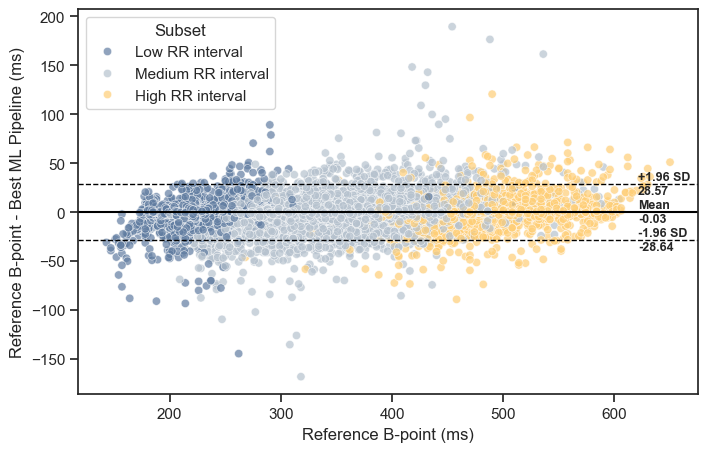

In [11]:
residual_plot_data['Diff. Reference - MinMax RFR'] = residual_plot_data['b_point_sample_reference'] - residual_plot_data['MinMax_None_RFR_RR-Interval-Include-Nan']

mean_diff = residual_plot_data['Diff. Reference - MinMax RFR'].mean()
std_diff = residual_plot_data['Diff. Reference - MinMax RFR'].std()

upper_limit = mean_diff + 1.96 * std_diff
lower_limit = mean_diff - 1.96 * std_diff

fig, axs = plt.subplots(figsize=(8,5))
fig.patch.set_facecolor('none')
sns.scatterplot(data=residual_plot_data,
              x='b_point_sample_reference',
              y='Diff. Reference - MinMax RFR',
              alpha=0.7,
              hue='Subset',
              hue_order=['Low RR interval', 'Medium RR interval', 'High RR interval'],
              ax=axs,
)
# Add mean line
axs.axhline(mean_diff, color='black', linestyle='-', linewidth=1.5)
axs.text(axs.get_xlim()[1] * 0.92, mean_diff, f'Mean\n{mean_diff:.2f}', va='center', ha='left', fontsize=9, fontdict={'weight': 'bold'})

# Add 1.96 SD lines (Limits of Agreement)
axs.axhline(upper_limit, color='black', linestyle='--', linewidth=1.0)
axs.text(axs.get_xlim()[1] * 0.92, upper_limit, f'+1.96 SD\n{upper_limit:.2f}', va='center', ha='left', fontsize=9, fontdict={'weight': 'bold'})

axs.axhline(lower_limit, color='black', linestyle='--', linewidth=1.0)
axs.text(axs.get_xlim()[1] * 0.92, lower_limit, f'-1.96 SD\n{lower_limit:.2f}', va='center', ha='left', fontsize=9, fontdict={'weight': 'bold'})

axs.set_ylabel("Reference B-point - Best ML Pipeline (ms)")
axs.set_xlabel("Reference B-point (ms)")
plt.show()

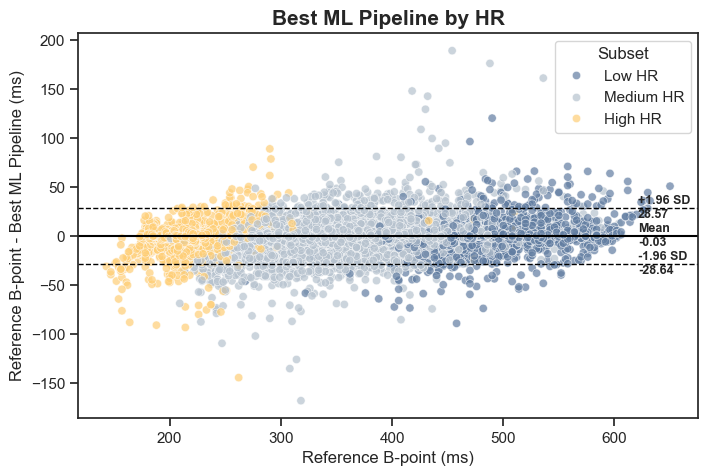

In [16]:
residual_plot_data_bpm['Diff. Reference - MinMax RFR'] = residual_plot_data_bpm['b_point_sample_reference'] - residual_plot_data_bpm['MinMax_None_RFR_RR-Interval-Include-Nan']

mean_diff = residual_plot_data_bpm['Diff. Reference - MinMax RFR'].mean()
std_diff = residual_plot_data_bpm['Diff. Reference - MinMax RFR'].std()

upper_limit = mean_diff + 1.96 * std_diff
lower_limit = mean_diff - 1.96 * std_diff

fig, axs = plt.subplots(figsize=(8,5))
fig.patch.set_facecolor('none')
sns.scatterplot(data=residual_plot_data_bpm,
              x='b_point_sample_reference',
              y='Diff. Reference - MinMax RFR',
              alpha=0.7,
              hue='Subset',
              hue_order=['Low HR', 'Medium HR', 'High HR'],
              ax=axs,
)
# Add mean line
axs.axhline(mean_diff, color='black', linestyle='-', linewidth=1.5)
axs.text(axs.get_xlim()[1] * 0.92, mean_diff, f'Mean\n{mean_diff:.2f}', va='center', ha='left', fontsize=9, fontdict={'weight': 'bold'})

# Add 1.96 SD lines (Limits of Agreement)
axs.axhline(upper_limit, color='black', linestyle='--', linewidth=1.0)
axs.text(axs.get_xlim()[1] * 0.92, upper_limit, f'+1.96 SD\n{upper_limit:.2f}', va='center', ha='left', fontsize=9, fontdict={'weight': 'bold'})

axs.axhline(lower_limit, color='black', linestyle='--', linewidth=1.0)
axs.text(axs.get_xlim()[1] * 0.92, lower_limit, f'-1.96 SD\n{lower_limit:.2f}', va='center', ha='left', fontsize=9, fontdict={'weight': 'bold'})

axs.set_ylabel("Reference B-point - Best ML Pipeline (ms)")
axs.set_xlabel("Reference B-point (ms)")
axs.set_title("Best ML Pipeline by HR", fontdict={"weight": "bold", "size": 15})
plt.show()

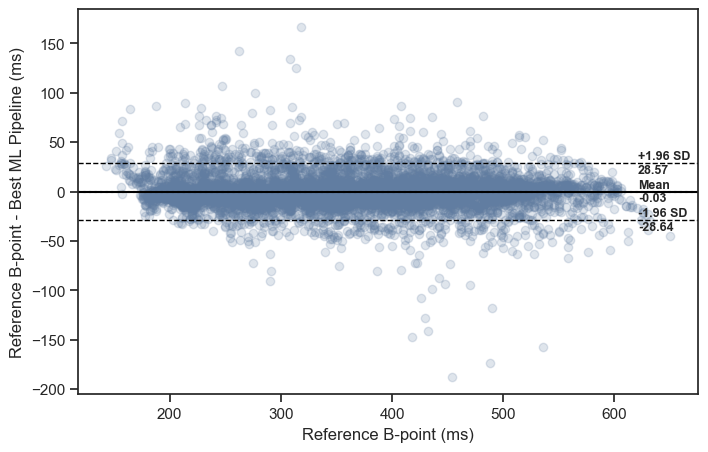

In [30]:
merged_ml_results_b_point['Diff. Reference - MinMax RFR'] = merged_ml_results_b_point['b_point_sample_reference'] - merged_ml_results_b_point['MinMax_None_RFR_RR-Interval-Include-Nan']

mean_diff = merged_ml_results_b_point['Diff. Reference - MinMax RFR'].mean()
std_diff = merged_ml_results_b_point['Diff. Reference - MinMax RFR'].std()

upper_limit = mean_diff + 1.96 * std_diff
lower_limit = mean_diff - 1.96 * std_diff

fig, axs = plt.subplots(figsize=(8,5))
sns.residplot(data=merged_ml_results_b_point,
              x='b_point_sample_reference',
              y='MinMax_None_RFR_RR-Interval-Include-Nan',
              scatter_kws={'alpha': 0.2},
              ax=axs
)
# Add mean line
axs.axhline(mean_diff, color='black', linestyle='-', linewidth=1.5)
axs.text(axs.get_xlim()[1] * 0.92, mean_diff, f'Mean\n{mean_diff:.2f}', va='center', ha='left', fontsize=9, fontdict={'weight': 'bold'})

# Add 1.96 SD lines (Limits of Agreement)
axs.axhline(upper_limit, color='black', linestyle='--', linewidth=1.0)
axs.text(axs.get_xlim()[1] * 0.92, upper_limit, f'+1.96 SD\n{upper_limit:.2f}', va='center', ha='left', fontsize=9, fontdict={'weight': 'bold'})

axs.axhline(lower_limit, color='black', linestyle='--', linewidth=1.0)
axs.text(axs.get_xlim()[1] * 0.92, lower_limit, f'-1.96 SD\n{lower_limit:.2f}', va='center', ha='left', fontsize=9, fontdict={'weight': 'bold'})

axs.set_ylabel("Reference B-point - Best ML Pipeline (ms)")
axs.set_xlabel("Reference B-point (ms)")
plt.show()

Boxplot of the best performing traditional- and ml-estimators

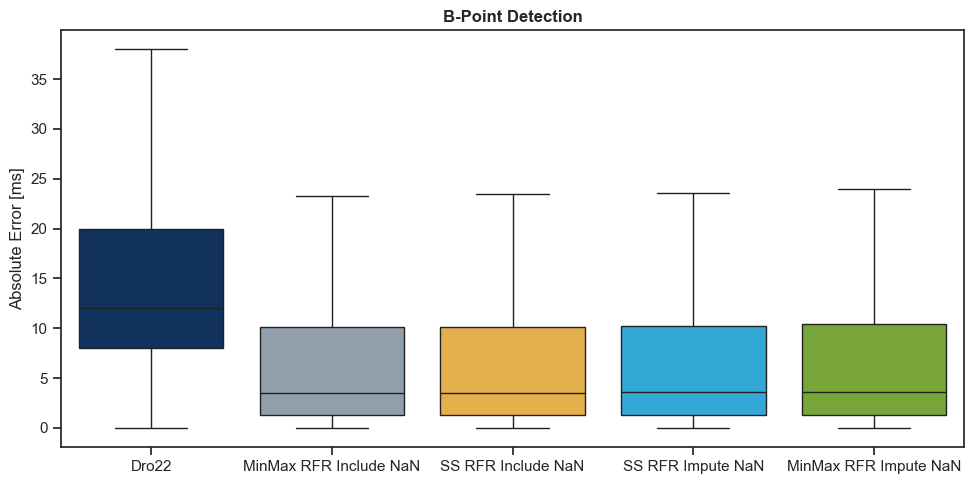

In [9]:
sns.boxplot(plot_data, showfliers=False)
plt.ylabel("Absolute Error [ms]")
plt.title("B-Point Detection", fontdict={"weight": "bold"})
plt.tight_layout()

Boxplots conditioned on Empkins/ Guardian Dataset

In [27]:
dataset_analysis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
dataset_analysis["Subset"] = "Empkins"
dataset_analysis.loc[dataset_analysis.index.get_level_values(level="condition").isin(['Dummy']), 'Subset'] = 'Guardian'
dataset_analysis = dataset_analysis.rename(columns=algo_dict)
model_list = [model for model in algo_dict.values() if model != "Dro22"]
dataset_analysis_long = dataset_analysis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "Subset"], var_name="Algorithm", value_name="B-Point")

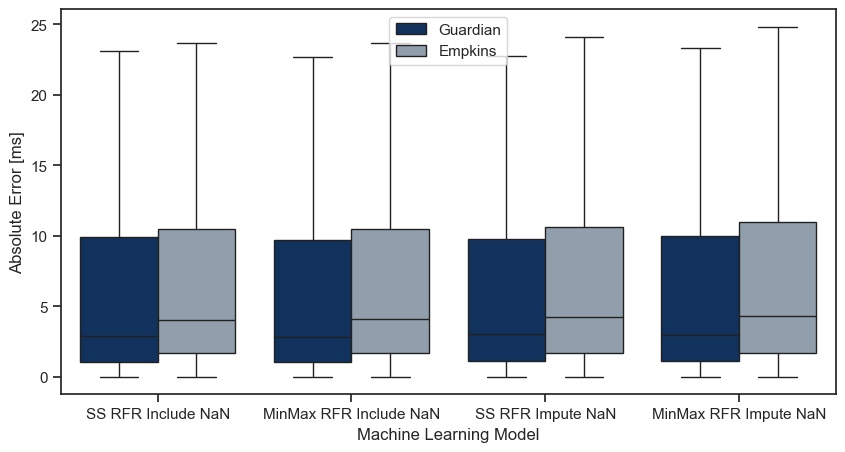

In [29]:
sns.boxplot(dataset_analysis_long[dataset_analysis_long["Algorithm"].isin(model_list)], x="Algorithm", y="B-Point", hue="Subset", showfliers=False)
plt.ylabel("Absolute Error [ms]")
plt.xlabel("Machine Learning Model")
plt.legend(loc='upper center')

Residualplots of the best performing traditional- and ml-estimators against the B-Point reference

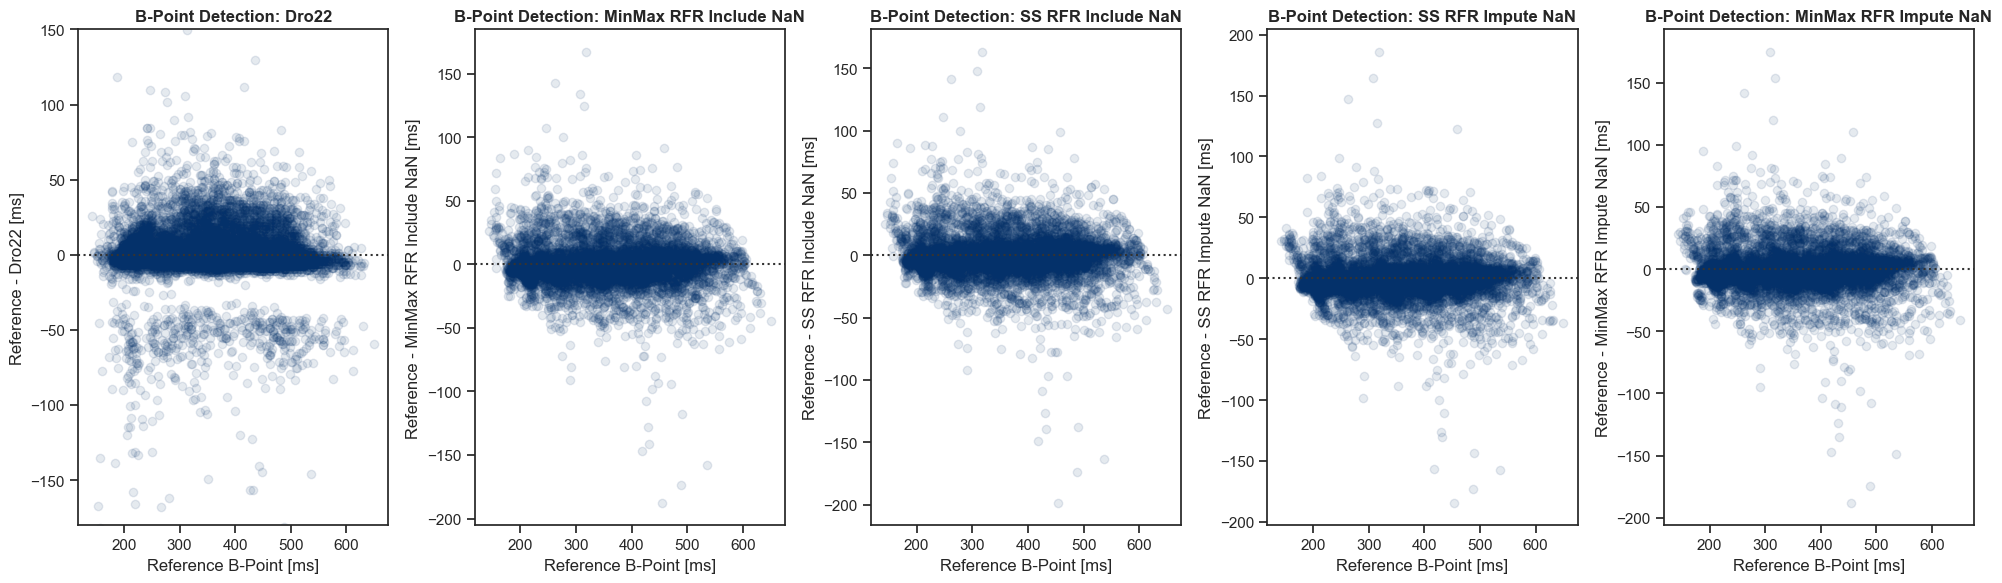

In [228]:
fig, axs = plt.subplots(1, 5, figsize=(20,6))
sns.residplot(merged_ml_results_b_point, x="b_point_sample_reference", y="drost2022", ax=axs[0], scatter_kws={"alpha": 0.1})
axs[0].set_ylabel(f"Reference - {algo_dict["drost2022_abs_error"]} [ms]")
axs[0].set_xlabel("Reference B-Point [ms]")
axs[0].set_ylim(-180, 150)
axs[0].set_title(f"B-Point Detection: {algo_dict["drost2022_abs_error"]}", fontdict={"weight": "bold"})
sns.residplot(merged_ml_results_b_point, x="b_point_sample_reference", y="MinMax_None_RFR_RR-Interval-Include-Nan", ax=axs[1], scatter_kws={"alpha": 0.1})
axs[1].set_ylabel(f"Reference - {algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
axs[1].set_xlabel("Reference B-Point [ms]")
axs[1].set_title(f"B-Point Detection: {algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]}", fontdict={"weight": "bold"})
sns.residplot(merged_ml_results_b_point, x ="b_point_sample_reference", y="SS_None_RFR_RR-Interval-Include-Nan", ax=axs[2], scatter_kws={"alpha": 0.1})
axs[2].set_ylabel(f"Reference - {algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
axs[2].set_xlabel("Reference B-Point [ms]")
axs[2].set_title(f"B-Point Detection: {algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]}", fontdict={"weight": "bold"})
sns.residplot(merged_ml_results_b_point, x ="b_point_sample_reference", y="SS_SFM_RFR_RR-Interval-Median-Imputed", ax=axs[3], scatter_kws={"alpha": 0.1})
axs[3].set_ylabel(f"Reference - {algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
axs[3].set_xlabel("Reference B-Point [ms]")
axs[3].set_title(f"B-Point Detection: {algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]}", fontdict={"weight": "bold"})
fig.tight_layout()
sns.residplot(merged_ml_results_b_point, x ="b_point_sample_reference", y="MinMax_KBest_RFR_RR-Interval-Median-Imputed", ax=axs[4], scatter_kws={"alpha": 0.1})
axs[4].set_ylabel(f"Reference - {algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
axs[4].set_xlabel("Reference B-Point [ms]")
axs[4].set_title(f"B-Point Detection: {algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]}", fontdict={"weight": "bold"})
fig.tight_layout()

Residualplot of the best performing machine learning models against each other

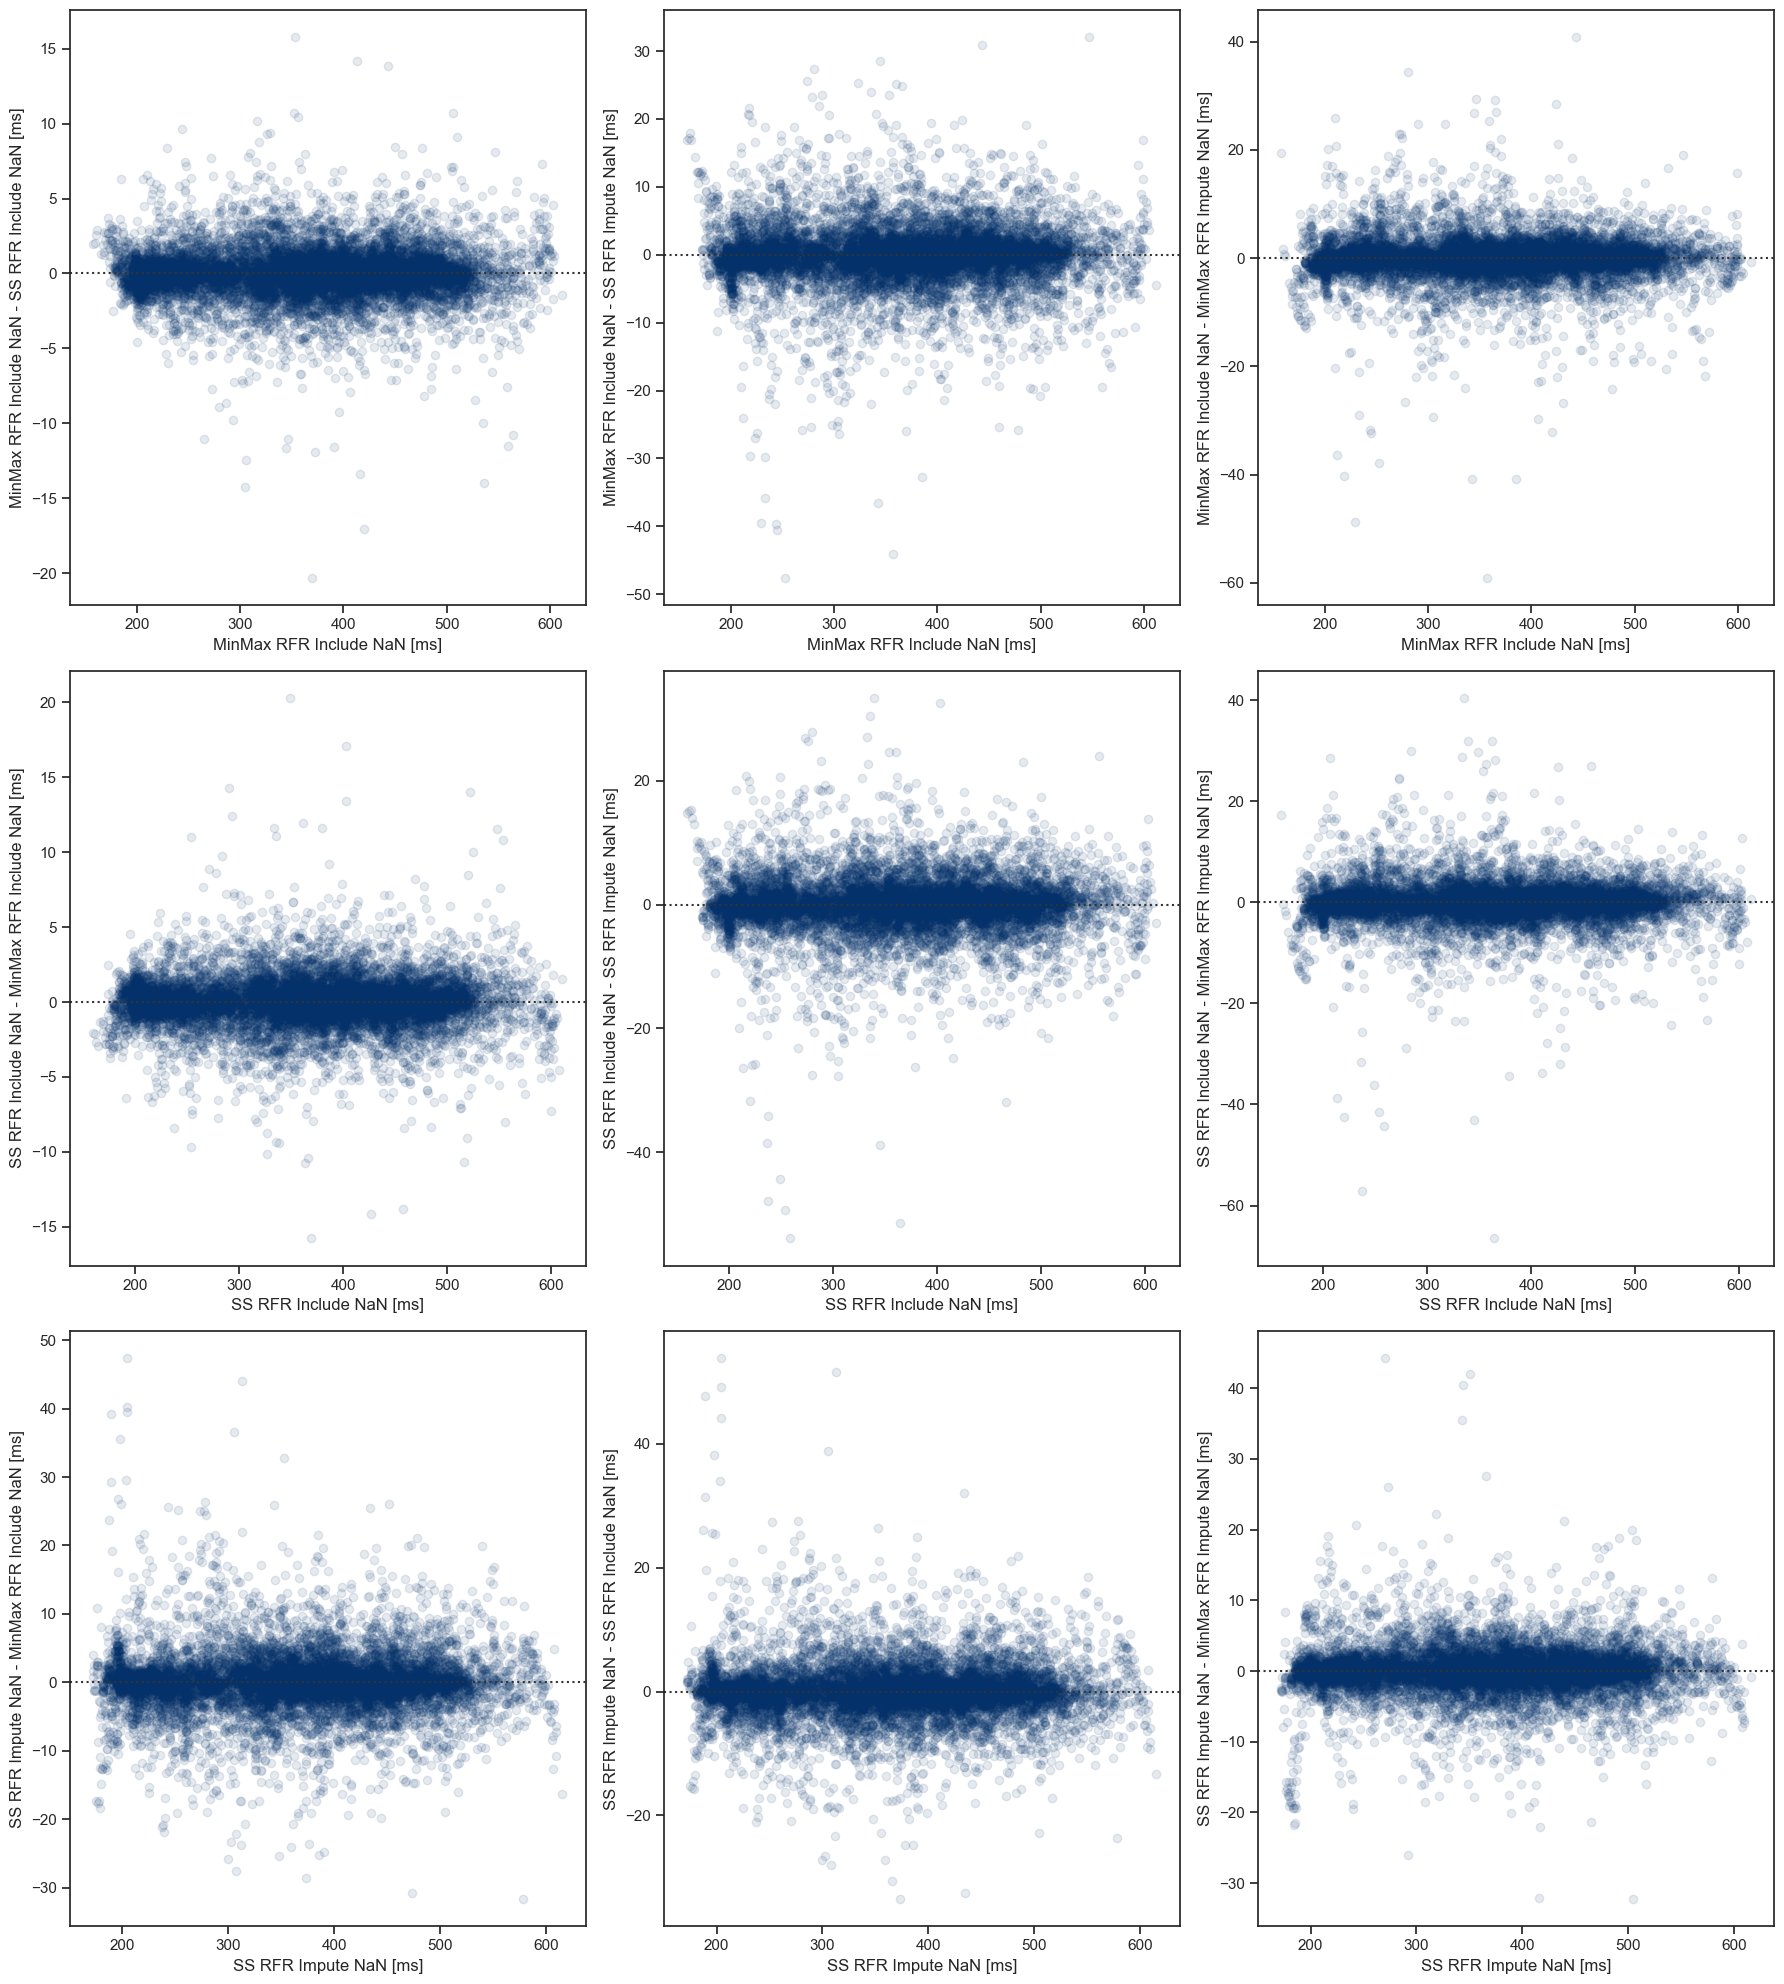

In [229]:
fig, axs = plt.subplots(3, 3, figsize=(18,20))
sns.residplot(merged_ml_results_b_point, x="MinMax_None_RFR_RR-Interval-Include-Nan", y="SS_None_RFR_RR-Interval-Include-Nan", ax=axs[0,0], scatter_kws={"alpha": 0.1})
axs[0,0].set_ylabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]} - {algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
axs[0,0].set_xlabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
sns.residplot(merged_ml_results_b_point, x="MinMax_None_RFR_RR-Interval-Include-Nan", y="SS_SFM_RFR_RR-Interval-Median-Imputed", ax=axs[0,1], scatter_kws={"alpha": 0.1})
axs[0,1].set_ylabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]} - {algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
axs[0,1].set_xlabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
sns.residplot(merged_ml_results_b_point, x ="MinMax_None_RFR_RR-Interval-Include-Nan", y="MinMax_KBest_RFR_RR-Interval-Median-Imputed", ax=axs[0,2], scatter_kws={"alpha": 0.1})
axs[0,2].set_ylabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]} - {algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
axs[0,2].set_xlabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
sns.residplot(merged_ml_results_b_point, x="SS_None_RFR_RR-Interval-Include-Nan", y="MinMax_None_RFR_RR-Interval-Include-Nan", ax=axs[1,0], scatter_kws={"alpha": 0.1})
axs[1,0].set_ylabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]} - {algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
axs[1,0].set_xlabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
sns.residplot(merged_ml_results_b_point, x="SS_None_RFR_RR-Interval-Include-Nan", y="SS_SFM_RFR_RR-Interval-Median-Imputed", ax=axs[1,1], scatter_kws={"alpha": 0.1})
axs[1,1].set_ylabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]} - {algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
axs[1,1].set_xlabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
sns.residplot(merged_ml_results_b_point, x="SS_None_RFR_RR-Interval-Include-Nan", y="MinMax_KBest_RFR_RR-Interval-Median-Imputed", ax=axs[1,2], scatter_kws={"alpha": 0.1})
axs[1,2].set_ylabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]} - {algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
axs[1,2].set_xlabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
sns.residplot(merged_ml_results_b_point, x="SS_SFM_RFR_RR-Interval-Median-Imputed", y="MinMax_None_RFR_RR-Interval-Include-Nan", ax=axs[2,0], scatter_kws={"alpha": 0.1})
axs[2,0].set_ylabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]} - {algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
axs[2,0].set_xlabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
sns.residplot(merged_ml_results_b_point, x="SS_SFM_RFR_RR-Interval-Median-Imputed", y="SS_None_RFR_RR-Interval-Include-Nan", ax=axs[2,1], scatter_kws={"alpha": 0.1})
axs[2,1].set_ylabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]} - {algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]} [ms]")
axs[2,1].set_xlabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
sns.residplot(merged_ml_results_b_point, x="SS_SFM_RFR_RR-Interval-Median-Imputed", y="MinMax_KBest_RFR_RR-Interval-Median-Imputed", ax=axs[2,2], scatter_kws={"alpha": 0.1})
axs[2,2].set_ylabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]} - {algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
axs[2,2].set_xlabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]} [ms]")
fig.tight_layout()

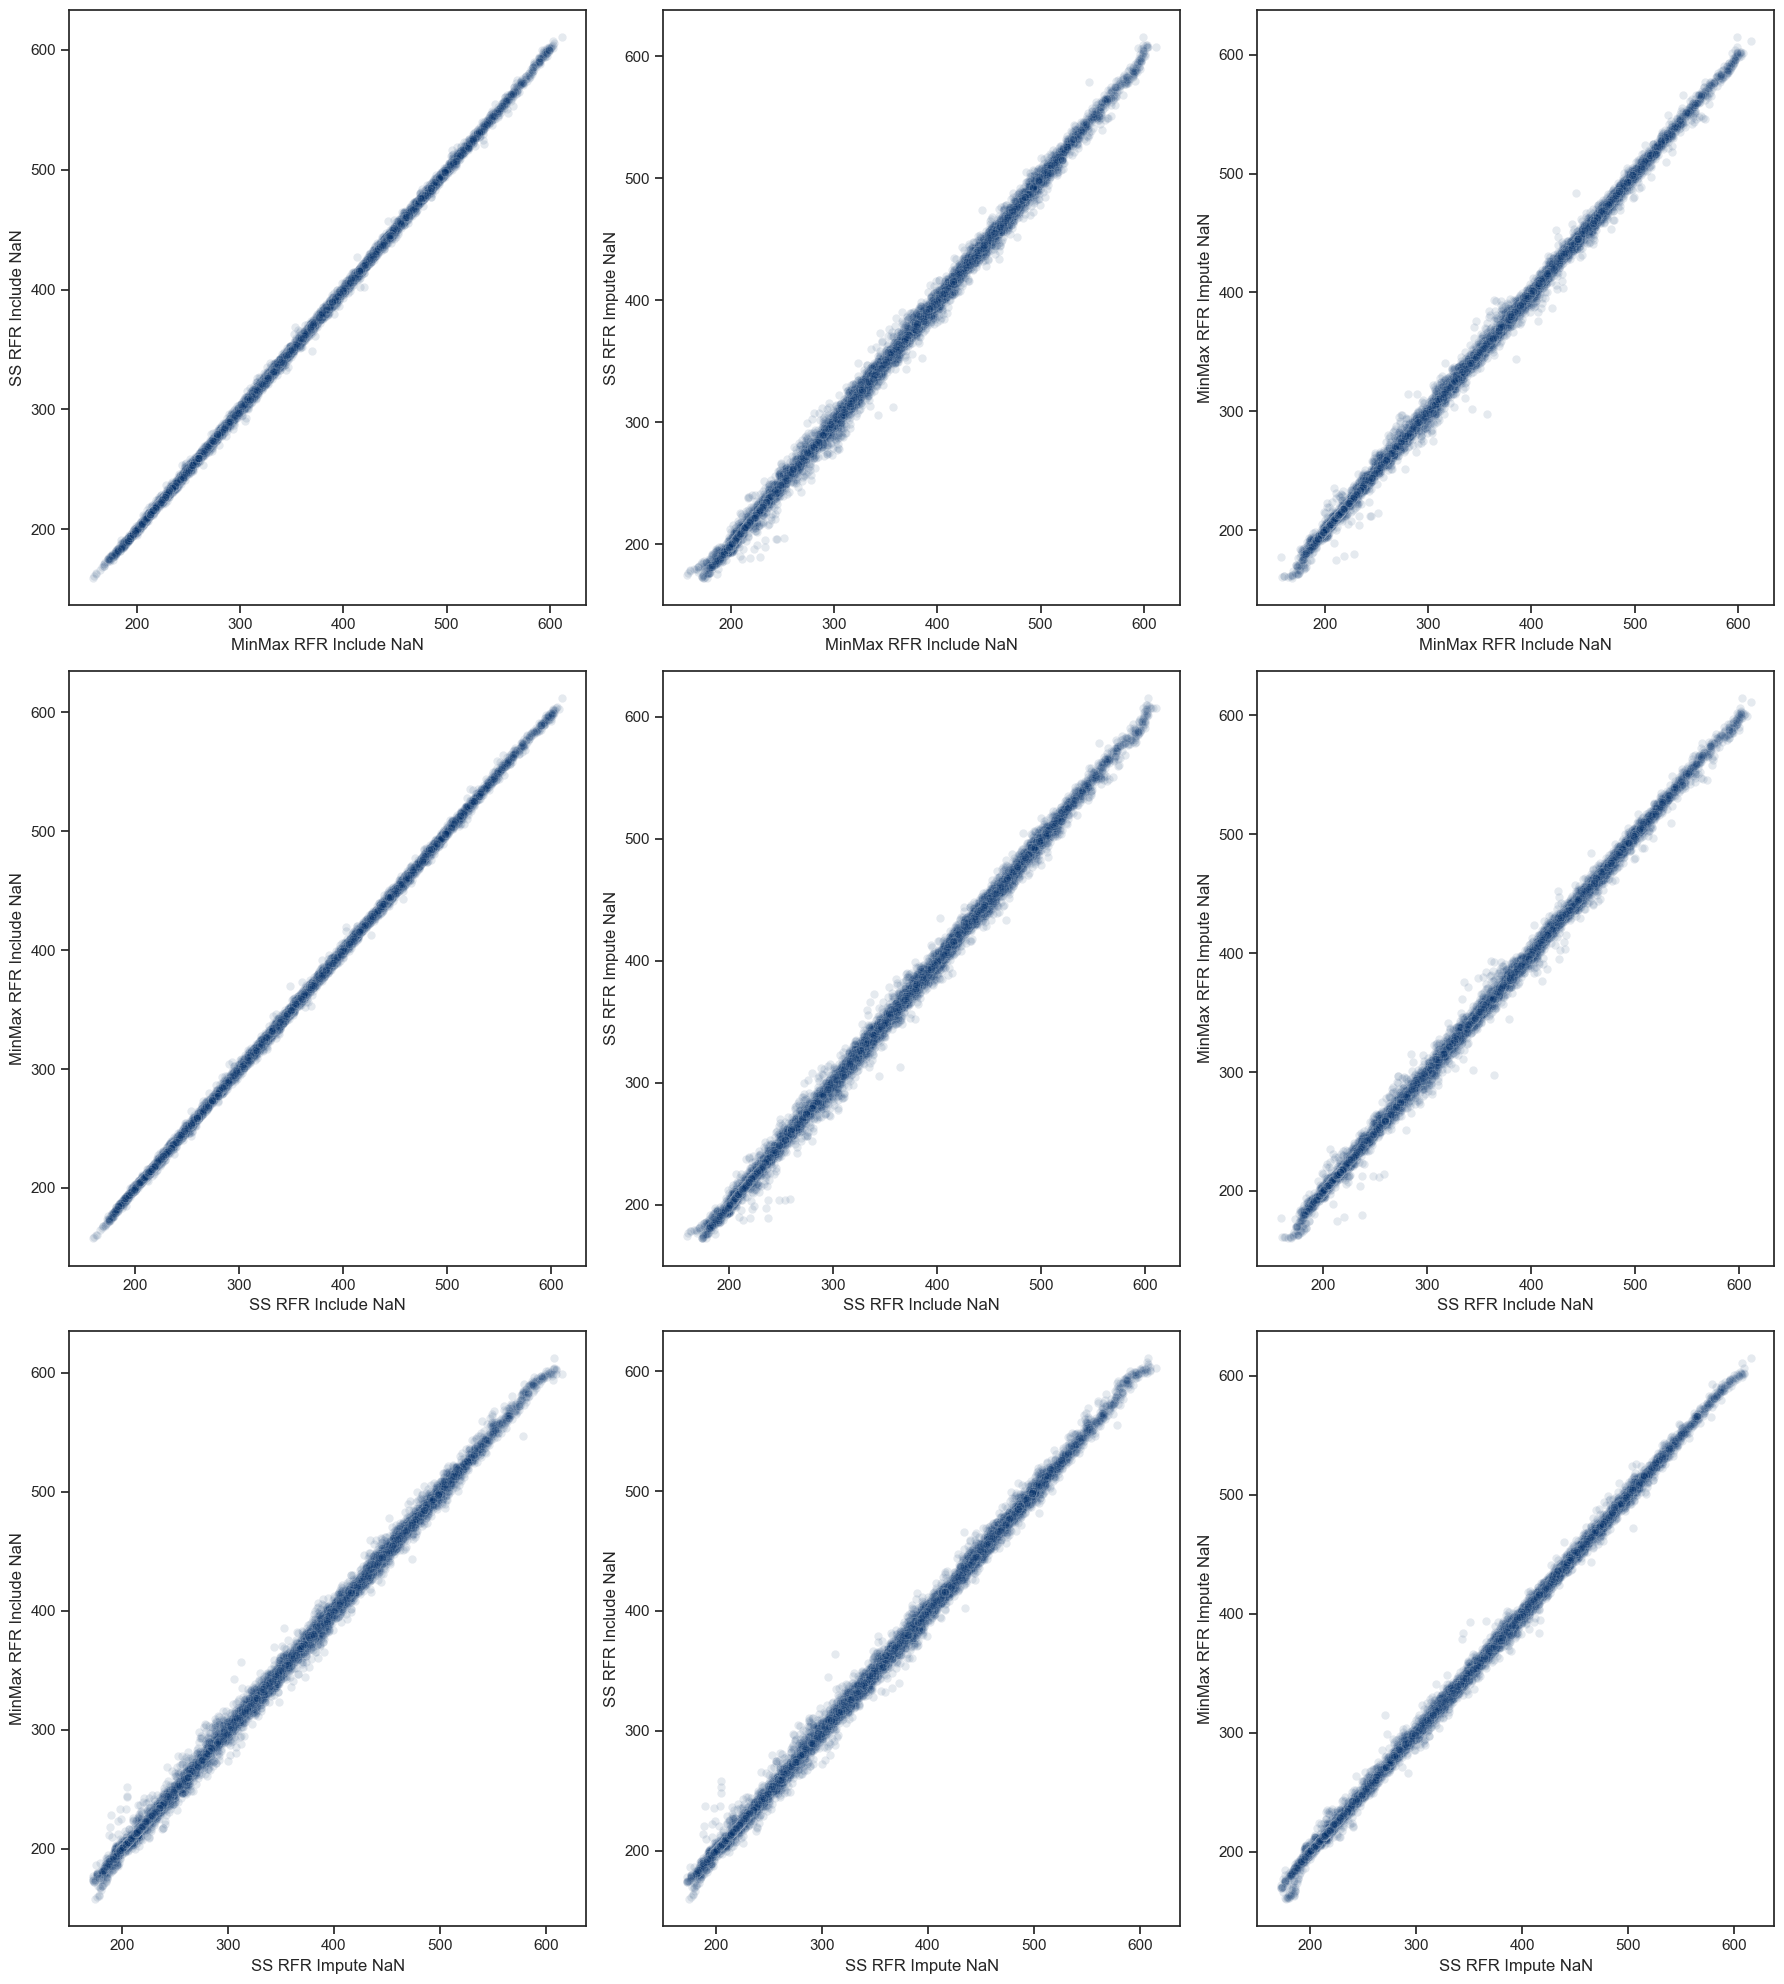

In [235]:
fig, axs = plt.subplots(3, 3, figsize=(18,20))
sns.scatterplot(merged_ml_results_b_point, x="MinMax_None_RFR_RR-Interval-Include-Nan", y="SS_None_RFR_RR-Interval-Include-Nan", ax=axs[0,0], alpha=0.1)
axs[0,0].set_ylabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
axs[0,0].set_xlabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
sns.scatterplot(merged_ml_results_b_point, x="MinMax_None_RFR_RR-Interval-Include-Nan", y="SS_SFM_RFR_RR-Interval-Median-Imputed", ax=axs[0,1], alpha=0.1)
axs[0,1].set_ylabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]}")
axs[0,1].set_xlabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
sns.scatterplot(merged_ml_results_b_point, x ="MinMax_None_RFR_RR-Interval-Include-Nan", y="MinMax_KBest_RFR_RR-Interval-Median-Imputed", ax=axs[0,2], alpha=0.1)
axs[0,2].set_ylabel(f"{algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]}")
axs[0,2].set_xlabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
sns.scatterplot(merged_ml_results_b_point, x="SS_None_RFR_RR-Interval-Include-Nan", y="MinMax_None_RFR_RR-Interval-Include-Nan", ax=axs[1,0], alpha=0.1)
axs[1,0].set_ylabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
axs[1,0].set_xlabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
sns.scatterplot(merged_ml_results_b_point, x="SS_None_RFR_RR-Interval-Include-Nan", y="SS_SFM_RFR_RR-Interval-Median-Imputed", ax=axs[1,1], alpha=0.1)
axs[1,1].set_ylabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]}")
axs[1,1].set_xlabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
sns.scatterplot(merged_ml_results_b_point, x="SS_None_RFR_RR-Interval-Include-Nan", y="MinMax_KBest_RFR_RR-Interval-Median-Imputed", ax=axs[1,2], alpha=0.1)
axs[1,2].set_ylabel(f"{algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]}")
axs[1,2].set_xlabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
sns.scatterplot(merged_ml_results_b_point, x="SS_SFM_RFR_RR-Interval-Median-Imputed", y="MinMax_None_RFR_RR-Interval-Include-Nan", ax=axs[2,0], alpha=0.1)
axs[2,0].set_ylabel(f"{algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
axs[2,0].set_xlabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]}")
sns.scatterplot(merged_ml_results_b_point, x="SS_SFM_RFR_RR-Interval-Median-Imputed", y="SS_None_RFR_RR-Interval-Include-Nan", ax=axs[2,1], alpha=0.1)
axs[2,1].set_ylabel(f"{algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]}")
axs[2,1].set_xlabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]}")
sns.scatterplot(merged_ml_results_b_point, x="SS_SFM_RFR_RR-Interval-Median-Imputed", y="MinMax_KBest_RFR_RR-Interval-Median-Imputed", ax=axs[2,2], alpha=0.1)
axs[2,2].set_ylabel(f"{algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]}")
axs[2,2].set_xlabel(f"{algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]}")
fig.tight_layout()

Residualplots of the best performing traditional- and ml-estimators against the B-Point reference

In [200]:
# Load ml_results in the long format
merged_ml_results_b_point_error_metrics_long = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics_long.csv"), index_col=[0,1,2,3])
merged_ml_results_b_point_error_metrics_long

Algorithm  \
participant condition phase         heartbeat_id_reference                                                      
GDN0005     Dummy     HoldingBreath 0                                   arbol2017-isoelectric-crossings_error   
                                    1                                   arbol2017-isoelectric-crossings_error   
                                    3                                   arbol2017-isoelectric-crossings_error   
                                    4                                   arbol2017-isoelectric-crossings_error   
                                    5                                   arbol2017-isoelectric-crossings_error   
...                                                                                                       ...   
VP_032      tsst      Talk          39                      MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   
                                    40                      MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   
                                    41                      MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   
                                    42                      MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   
                                    43                      MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   

                                                                Error  
participant condition phase         heartbeat_id_reference             
GDN0005     Dummy     HoldingBreath 0                      -50.000000  
                                    1                       64.000000  
                                    3                       -6.000000  
                                    4                       -4.000000  
                                    5                      -12.000000  
...                                                               ...  
VP_032      tsst      Talk          39                       0.032103  
                                    40                       0.012937  
                                    41                       0.031845  
                                    42                       0.092182  
                                    43                       0.024204  

[3776304 rows x 2 columns]

c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\pingouin\plotting.py:573: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["wthn"] = data[within].replace({_ordr: i for i, _ordr in enumerate(order)})
C:\Users\sebas\AppData\Local\Temp\ipykernel_3980\1260981461.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels([algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"], algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]])
c:\Users\sebas\Development\ResearchInternship\Code\pepbench\.venv\Lib\site-packages\pingouin\plotting.py:573: FutureWarning: Downcasting behavior in `replace` is deprecated and will 

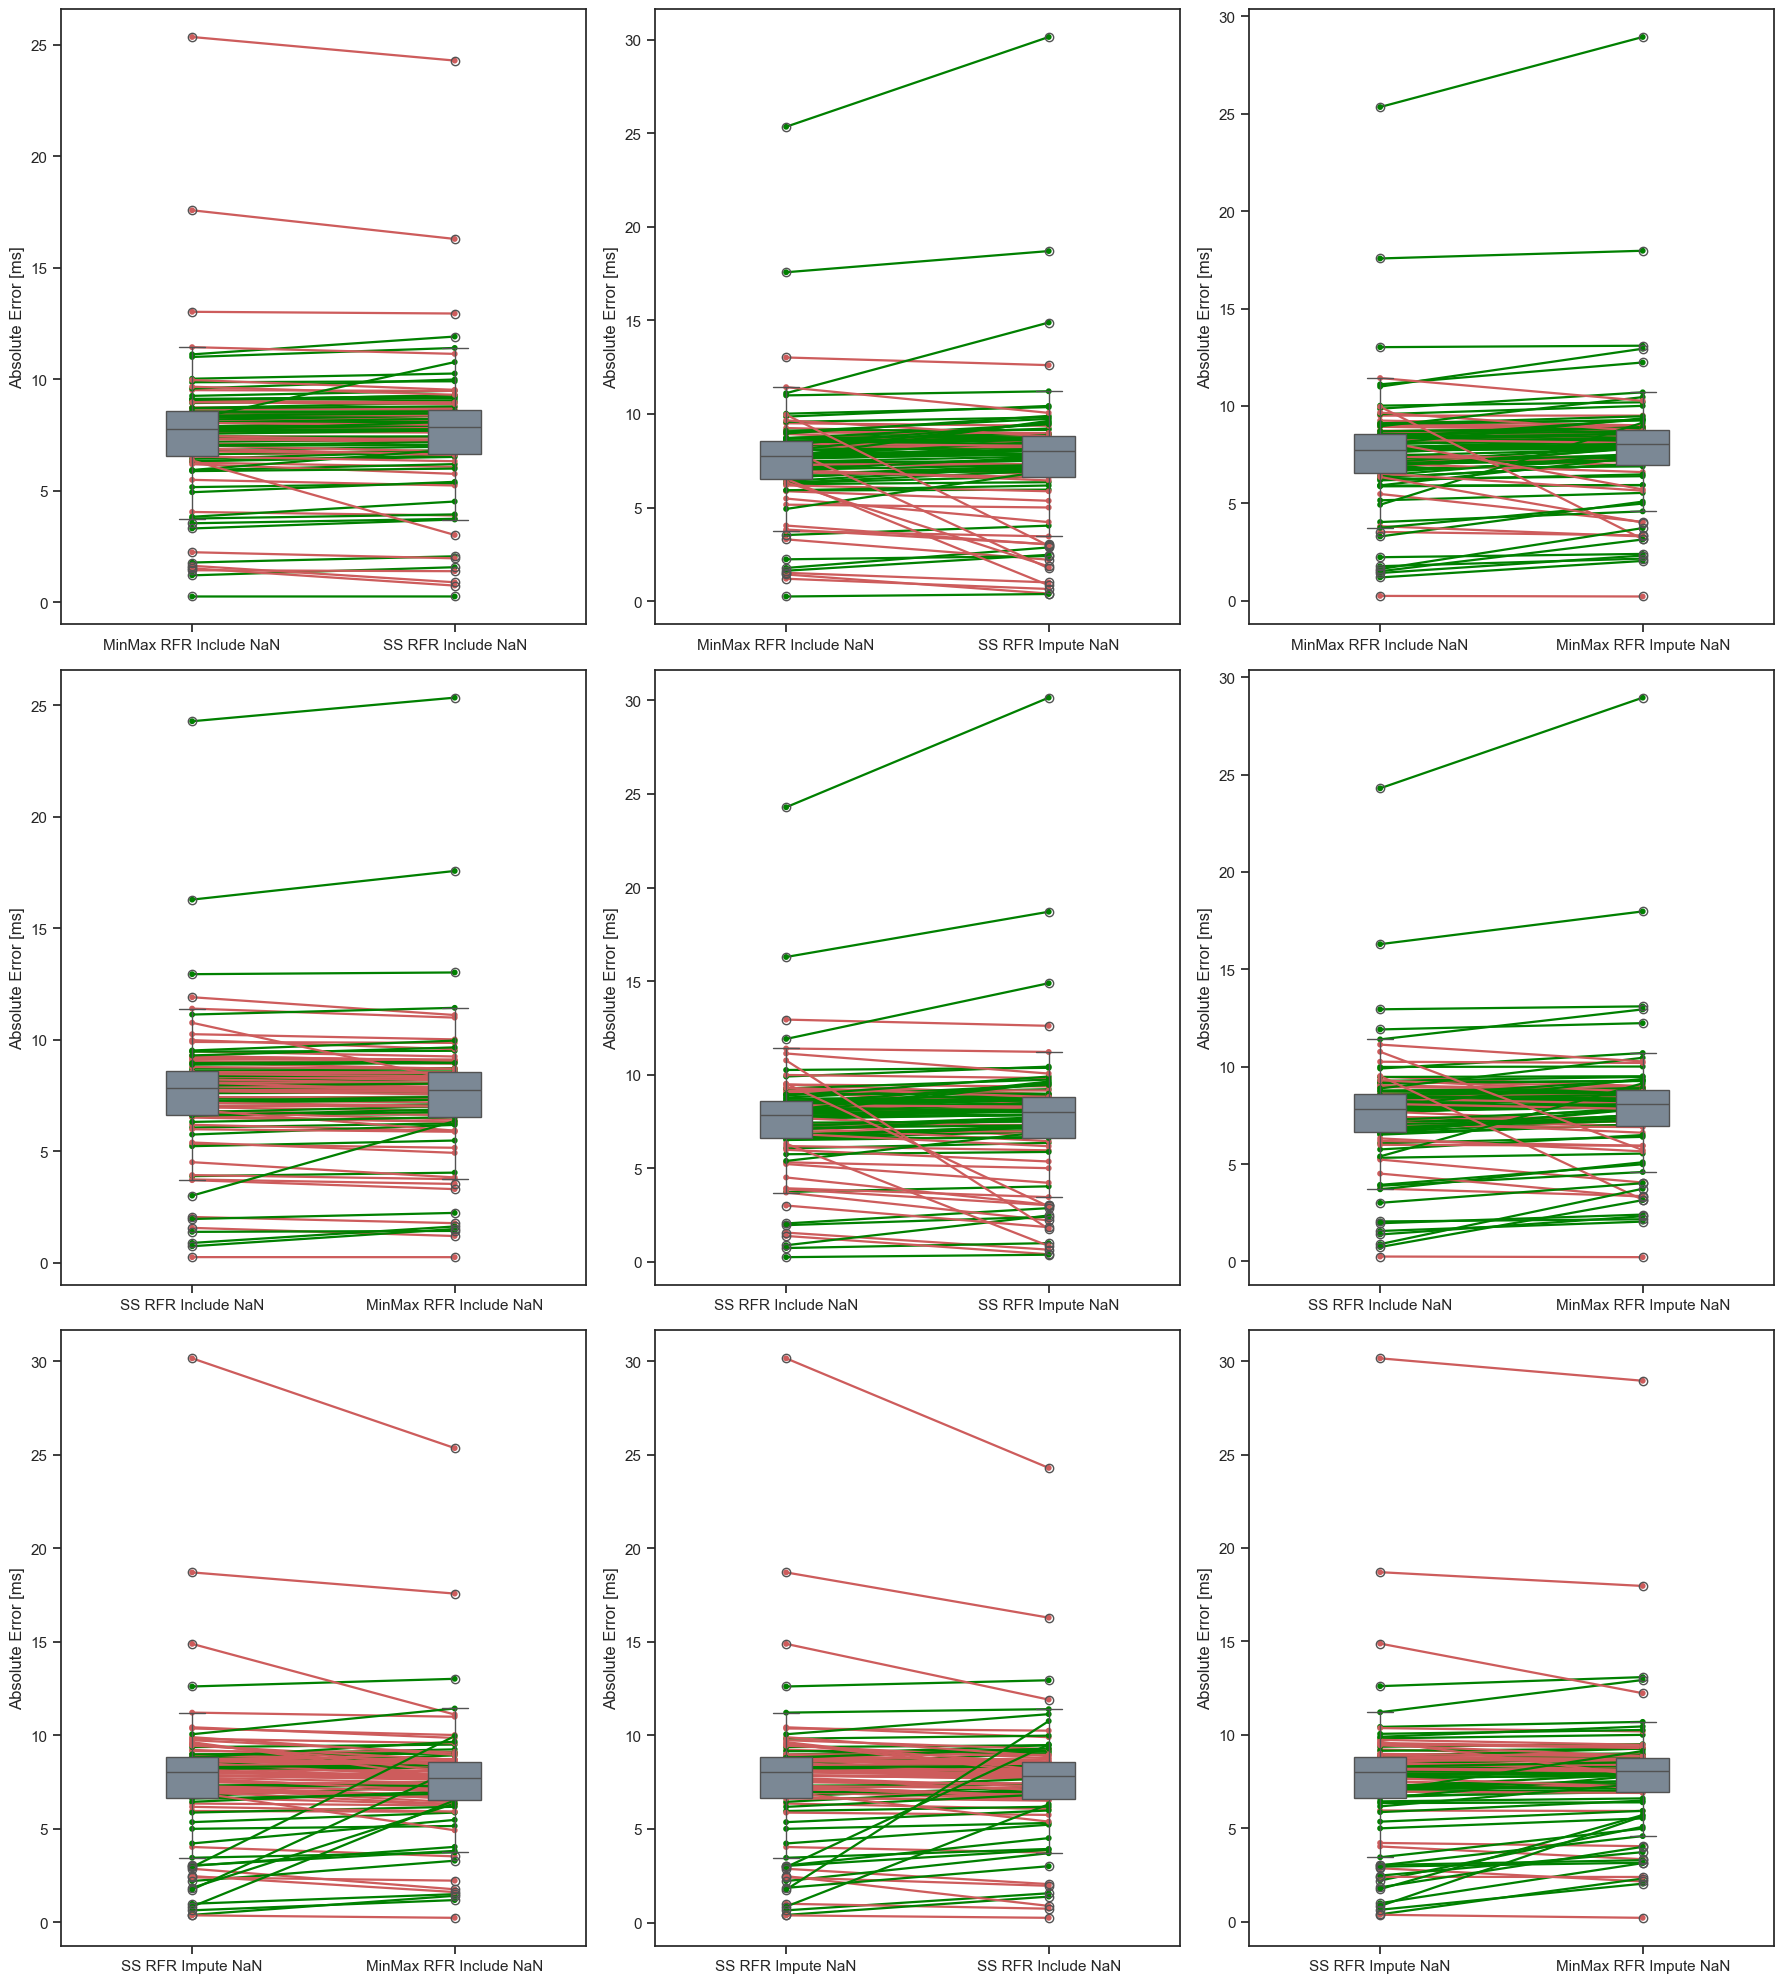

In [217]:
fig, axs = plt.subplots(3,3, figsize=(18, 20))
pg.plot_paired(
    data=merged_ml_results_b_point_error_metrics_long[merged_ml_results_b_point_error_metrics_long['Algorithm'].isin(["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error", "SS_None_RFR_RR-Interval-Include-Nan_abs_error"])], 
    dv="Error",
    within="Algorithm",
    subject="heartbeat_id_reference",
    order=[f"MinMax_None_RFR_RR-Interval-Include-Nan_abs_error", f"SS_None_RFR_RR-Interval-Include-Nan_abs_error"],
    boxplot=True,
    ax=axs[0, 0],
    )
axs[0, 0].set_ylabel("Absolute Error [ms]")
axs[0, 0].set_xticklabels([algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"], algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]])
axs[0, 0].set_xlabel(None)
pg.plot_paired(
    data=merged_ml_results_b_point_error_metrics_long[merged_ml_results_b_point_error_metrics_long['Algorithm'].isin(["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error", "SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"])], 
    dv="Error",
    within="Algorithm",
    subject="heartbeat_id_reference",
    order=["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error", "SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"],
    boxplot=True,
    ax=axs[0, 1],
    )
axs[0, 1].set_ylabel("Absolute Error [ms]")
axs[0, 1].set_xticklabels([algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"], algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]])
axs[0, 1].set_xlabel(None)
pg.plot_paired(
    data=merged_ml_results_b_point_error_metrics_long[merged_ml_results_b_point_error_metrics_long['Algorithm'].isin(["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error", "MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"])], 
    dv="Error",
    within="Algorithm",
    subject="heartbeat_id_reference",
    order=["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error", "MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"],
    boxplot=True,
    ax=axs[0, 2],
    )
axs[0, 2].set_ylabel("Absolute Error [ms]")
axs[0, 2].set_xticklabels([algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"], algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]])
axs[0, 2].set_xlabel(None)

# ----------------------------------------------------------------

pg.plot_paired(
    data=merged_ml_results_b_point_error_metrics_long[merged_ml_results_b_point_error_metrics_long['Algorithm'].isin(["SS_None_RFR_RR-Interval-Include-Nan_abs_error", "MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"])], 
    dv="Error",
    within="Algorithm",
    subject="heartbeat_id_reference",
    order=[f"SS_None_RFR_RR-Interval-Include-Nan_abs_error", f"MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"],
    boxplot=True,
    ax=axs[1, 0],
    )
axs[1, 0].set_ylabel("Absolute Error [ms]")
axs[1, 0].set_xticklabels([algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"], algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]])
axs[1, 0].set_xlabel(None)
pg.plot_paired(
    data=merged_ml_results_b_point_error_metrics_long[merged_ml_results_b_point_error_metrics_long['Algorithm'].isin(["SS_None_RFR_RR-Interval-Include-Nan_abs_error", "SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"])], 
    dv="Error",
    within="Algorithm",
    subject="heartbeat_id_reference",
    order=["SS_None_RFR_RR-Interval-Include-Nan_abs_error", "SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"],
    boxplot=True,
    ax=axs[1, 1],
    )
axs[1, 1].set_ylabel("Absolute Error [ms]")
axs[1, 1].set_xticklabels([algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"], algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"]])
axs[1, 1].set_xlabel(None)
pg.plot_paired(
    data=merged_ml_results_b_point_error_metrics_long[merged_ml_results_b_point_error_metrics_long['Algorithm'].isin(["SS_None_RFR_RR-Interval-Include-Nan_abs_error", "MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"])], 
    dv="Error",
    within="Algorithm",
    subject="heartbeat_id_reference",
    order=["SS_None_RFR_RR-Interval-Include-Nan_abs_error", "MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"],
    boxplot=True,
    ax=axs[1, 2],
    )
axs[1, 2].set_ylabel("Absolute Error [ms]")
axs[1, 2].set_xticklabels([algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"], algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]])
axs[1, 2].set_xlabel(None)

# ----------------------------------------------------------------

pg.plot_paired(
    data=merged_ml_results_b_point_error_metrics_long[merged_ml_results_b_point_error_metrics_long['Algorithm'].isin(["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error", "MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"])], 
    dv="Error",
    within="Algorithm",
    subject="heartbeat_id_reference",
    order=[f"SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error", f"MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"],
    boxplot=True,
    ax=axs[2, 0],
    )
axs[2, 0].set_ylabel("Absolute Error [ms]")
axs[2, 0].set_xticklabels([algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"], algo_dict["MinMax_None_RFR_RR-Interval-Include-Nan_abs_error"]])
axs[2, 0].set_xlabel(None)
pg.plot_paired(
    data=merged_ml_results_b_point_error_metrics_long[merged_ml_results_b_point_error_metrics_long['Algorithm'].isin(["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error", "SS_None_RFR_RR-Interval-Include-Nan_abs_error"])], 
    dv="Error",
    within="Algorithm",
    subject="heartbeat_id_reference",
    order=["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error", "SS_None_RFR_RR-Interval-Include-Nan_abs_error"],
    boxplot=True,
    ax=axs[2, 1],
    )
axs[2, 1].set_ylabel("Absolute Error [ms]")
axs[2, 1].set_xticklabels([algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"], algo_dict["SS_None_RFR_RR-Interval-Include-Nan_abs_error"]])
axs[2, 1].set_xlabel(None)
pg.plot_paired(
    data=merged_ml_results_b_point_error_metrics_long[merged_ml_results_b_point_error_metrics_long['Algorithm'].isin(["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error", "MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"])], 
    dv="Error",
    within="Algorithm",
    subject="heartbeat_id_reference",
    order=["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error", "MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"],
    boxplot=True,
    ax=axs[2, 2],
    )
axs[2, 2].set_ylabel("Absolute Error [ms]")
axs[2, 2].set_xticklabels([algo_dict["SS_SFM_RFR_RR-Interval-Median-Imputed_abs_error"], algo_dict["MinMax_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]])
axs[2, 2].set_xlabel(None)

fig.tight_layout()

Plot on the subsets 
- no feature detection algorithm failed
- at least one feature detection algorithm failed

In [115]:
miss_value_analyis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
miss_value_analyis["Subset"] = "All features detected"
mask_feature_detection_failed = miss_value_analyis['MinMax_KBest_RFR_RR-Interval_abs_error'].isna()
miss_value_analyis.loc[mask_feature_detection_failed, "Subset"] = "Feature detection failed"
miss_value_analyis = miss_value_analyis.rename(columns=algo_dict)
model_list = [model for model in algo_dict.values() if model != "Dro22"]
miss_value_analyis_long = miss_value_analyis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "Subset"], var_name="Algorithm", value_name="B-Point")

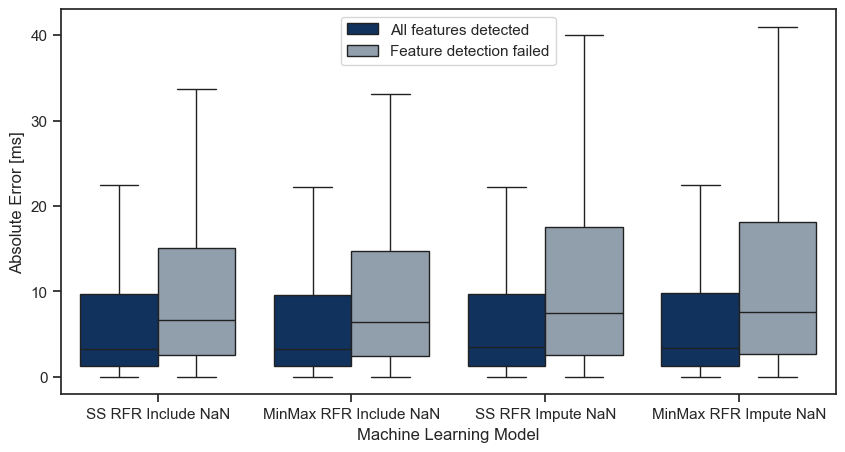

In [166]:
sns.boxplot(miss_value_analyis_long[miss_value_analyis_long["Algorithm"].isin(model_list)], x="Algorithm", y="B-Point", hue="Subset", showfliers=False)
plt.ylabel("Absolute Error [ms]")
plt.xlabel("Machine Learning Model")
plt.legend(loc='upper center')

Plot on subsets that reflect different HR:
- RR-Interval < mean - std
- mean - std < RR-Interval < mean + std
- mean + std < RR-Interval 

In [135]:
lower_limit = 600
upper_limit = 1000
group_low_rr_interval_mask = merged_ml_results_b_point['rr_interval_ms_estimated'] < lower_limit
group_low_rr_interval = merged_ml_results_b_point.loc[group_low_rr_interval_mask]
group_medium_rr_interval_mask = ((merged_ml_results_b_point['rr_interval_ms_estimated'] >= lower_limit) & (merged_ml_results_b_point['rr_interval_ms_estimated'] <= upper_limit))
group_medium_rr_interval = merged_ml_results_b_point.loc[group_medium_rr_interval_mask]
group_high_rr_interval_mask = merged_ml_results_b_point['rr_interval_ms_estimated'] > upper_limit
group_high_rr_interval = merged_ml_results_b_point.loc[group_high_rr_interval_mask]

In [138]:
rr_interval_analyis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
rr_interval_analyis["Subset"] = "Medium RR-Interval"
rr_interval_analyis.loc[group_low_rr_interval_mask, "Subset"] = "Low RR-Interval"
rr_interval_analyis.loc[group_high_rr_interval_mask, "Subset"] = "High RR-Interval"
rr_interval_analyis = rr_interval_analyis.rename(columns=algo_dict)
model_list = [model for model in algo_dict.values() if model != "Dro22"]
rr_interval_analyis_long = rr_interval_analyis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "Subset"], var_name="Algorithm", value_name="B-Point")

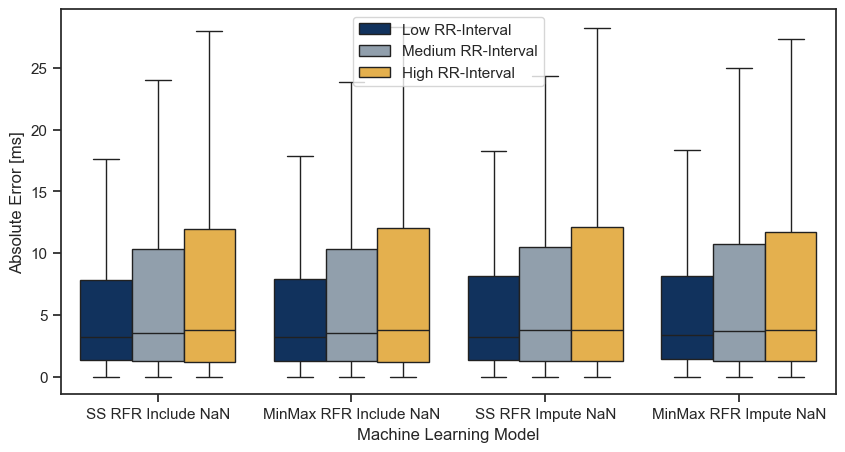

In [165]:
sns.boxplot(rr_interval_analyis_long[rr_interval_analyis_long["Algorithm"].isin(model_list)], x="Algorithm", y="B-Point", hue="Subset", hue_order=["Low RR-Interval", "Medium RR-Interval", "High RR-Interval"], showfliers=False)
plt.ylabel("Absolute Error [ms]")
plt.xlabel("Machine Learning Model")
plt.legend(loc='upper center')

Plot on subsets that represent inter rater variability

In [144]:
inter_rater_analyis = pd.read_csv(data_path.joinpath("merged_ml_results_b_point_error_metrics.csv"), index_col=[0,1,2,3])
inter_rater_agreement = pd.read_csv(data_path.joinpath("inter_rater_agreement.csv"), index_col=[0,1,2,3])
joinable_ids = inter_rater_analyis.index.intersection(inter_rater_agreement.index)

In [151]:
inter_rater_analyis.loc[joinable_ids, 'Agreement'] = inter_rater_agreement.loc[joinable_ids]['Agreement']
inter_rater_analyis = inter_rater_analyis.rename(columns=algo_dict)
model_list = [model for model in algo_dict.values() if model != "Dro22"]
inter_rater_analyis_long = inter_rater_analyis.reset_index().melt(id_vars=["participant", "condition", "phase", "heartbeat_id_reference", "Agreement"], var_name="Algorithm", value_name="B-Point")
inter_rater_analyis_long

participant condition          phase  heartbeat_id_reference  \
0           GDN0005     Dummy  HoldingBreath                       0   
1           GDN0005     Dummy  HoldingBreath                       1   
2           GDN0005     Dummy  HoldingBreath                       3   
3           GDN0005     Dummy  HoldingBreath                       4   
4           GDN0005     Dummy  HoldingBreath                       5   
...             ...       ...            ...                     ...   
3776299      VP_032      tsst           Talk                      39   
3776300      VP_032      tsst           Talk                      40   
3776301      VP_032      tsst           Talk                      41   
3776302      VP_032      tsst           Talk                      42   
3776303      VP_032      tsst           Talk                      43   

                Agreement                                          Algorithm  \
0          High Agreement              arbol2017-isoelectric-crossings_error   
1          High Agreement              arbol2017-isoelectric-crossings_error   
2          High Agreement              arbol2017-isoelectric-crossings_error   
3          High Agreement              arbol2017-isoelectric-crossings_error   
4          High Agreement              arbol2017-isoelectric-crossings_error   
...                   ...                                                ...   
3776299    High Agreement  MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   
3776300  Medium Agreement  MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   
3776301  Medium Agreement  MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   
3776302    High Agreement  MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   
3776303  Medium Agreement  MinMax_KBest_KNR_RR-Interval-Median-Imputed_ab...   

           B-Point  
0       -50.000000  
1        64.000000  
2        -6.000000  
3        -4.000000  
4       -12.000000  
...            ...  
3776299   0.032103  
3776300   0.012937  
3776301   0.031845  
3776302   0.092182  
3776303   0.024204  

[3776304 rows x 7 columns]

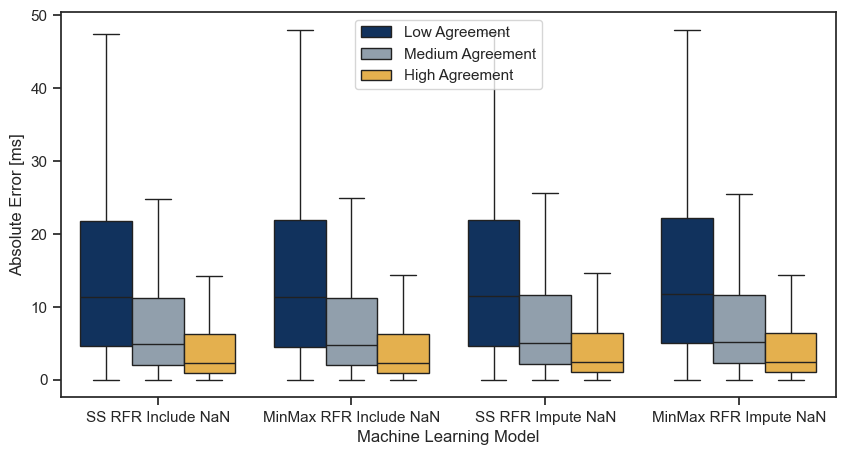

In [164]:
sns.boxplot(inter_rater_analyis_long[inter_rater_analyis_long["Algorithm"].isin(model_list)], x="Algorithm", y="B-Point", hue="Agreement", hue_order=['Low Agreement', 'Medium Agreement', 'High Agreement'], showfliers=False)
plt.ylabel("Absolute Error [ms]")
plt.xlabel("Machine Learning Model")
plt.legend(loc='upper center')